http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

https://docs.opencv.org/master/d7/d00/tutorial_meanshift.html

https://pysource.com/2018/04/05/object-tracking-with-mean-shift-opencv-3-4-with-python-3-tutorial-29/

https://docs.opencv.org/3.4/da/d7f/tutorial_back_projection.html

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2 as cv

from matplotlib import animation, rc
from IPython.display import HTML

from PIL import Image
import glob

In [2]:
def cv2_imshow(img):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.axis("off")
    plt.show()
    
def plot_colors_hsv(img):
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    h, s, v = cv.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()
    
    plt.hist(h)
    plt.show()
    


In [3]:
configs = [
    {
        'track': [227,207,122,99],
        'dataset_name': 'BlurCar2',
        'image_src': '../data/{}/img/*.jpg'.format('BlurCar2'),
        'bins': 180,
        'filter_mask_from': (0.,0.,0.),
        'filter_mask_to': (180.,255.,100.)
    },
    
    {
        'track': [198,214,34,81],
        'dataset_name': 'Basketball',
        'image_src': '../data/{}/img/*.jpg'.format('Basketball'),
        'bins': 3,
        'filter_mask_from': (33.,60.,55.),
        'filter_mask_to': (84.,255.,193.)
    },
    
    {
        'track': [450,91,31,37],
        'dataset_name': 'Bird1',
        'image_src': '../data/{}/img/*.jpg'.format('Bird1'),
        'bins': 50,
        'filter_mask_from': (1.,60.,32.),
        'filter_mask_to': (12.,255.,255.)
    },
    
    
    {
        'track': [262,94,16,26],
        'dataset_name': 'Biker',
        'image_src': '../data/{}/img/*.jpg'.format('Biker'),
        'bins': 10,
        'filter_mask_from': (80.,0.,0.),
        'filter_mask_to': (180.,255.,255.)
    },
    
    {
        'track': [336,165,26,61],
        'dataset_name': 'Bolt',
        'image_src': '../data/{}/img/*.jpg'.format('Bolt'),
        'bins': 180,
        'filter_mask_from': (0.,0.,0.),
        'filter_mask_to': (25.,255.,30.)
    }, 
]

In [4]:
# track = [227,207,122,99] # bound box of the object to track
# dataset_name = 'BlurCar2'
# image_src = '../data/{}/img/*.jpg'.format(dataset_name)

# bins = 180
# filter_mask_from = (0.,0.,0.)
# filter_mask_to = (180.,255.,100.)

In [5]:
# track = [198,214,34,81] # bound box of the object to track
# dataset_name = 'Basketball'
# image_src = '../data/{}/img/*.jpg'.format(dataset_name)

# bins = 3
# filter_mask_from = (33.,60.,55.)
# filter_mask_to = (84.,255.,193.)

In [6]:
# track = [450,91,31,37] # bound box of the object to track
# dataset_name = 'Bird1'
# image_src = '../data/{}/img/*.jpg'.format(dataset_name)

# bins = 50
# filter_mask_from = (1.,60.,32.)
# filter_mask_to = (12.,255.,255.)

In [7]:
# track = [262,94,16,26] # bound box of the object to track
# dataset_name = 'Biker'
# image_src = '../data/{}/img/*.jpg'.format(dataset_name)

# bins = 10
# filter_mask_from = (80.,0.,0.)
# filter_mask_to = (180.,255.,255.)

In [8]:
track = [336,165,26,61] # bound box of the object to track
dataset_name = 'Bolt'
image_src = '../data/{}/img/*.jpg'.format(dataset_name)

bins = 180
filter_mask_from = (0.,0.,0.)
filter_mask_to = (25.,255.,30.)

In [9]:
# load images
image_list = []  
for file in sorted(glob.glob(image_src)):
    image_list.append(file)

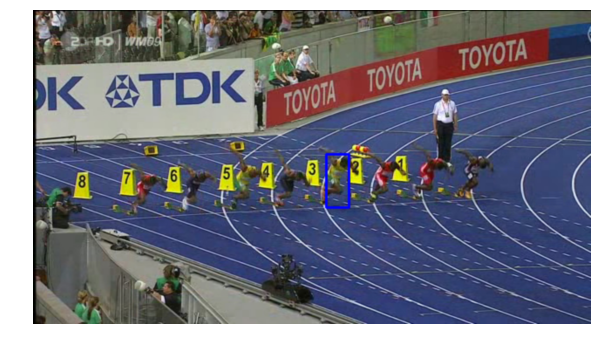

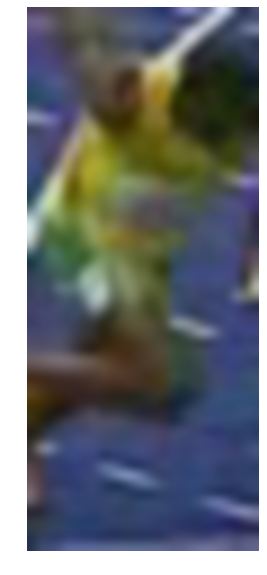

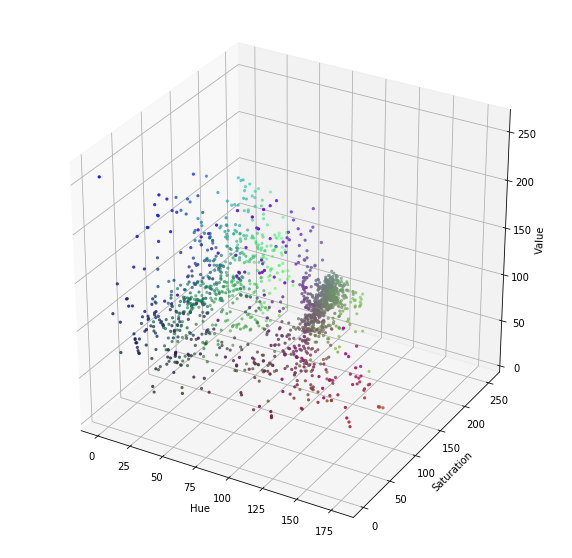

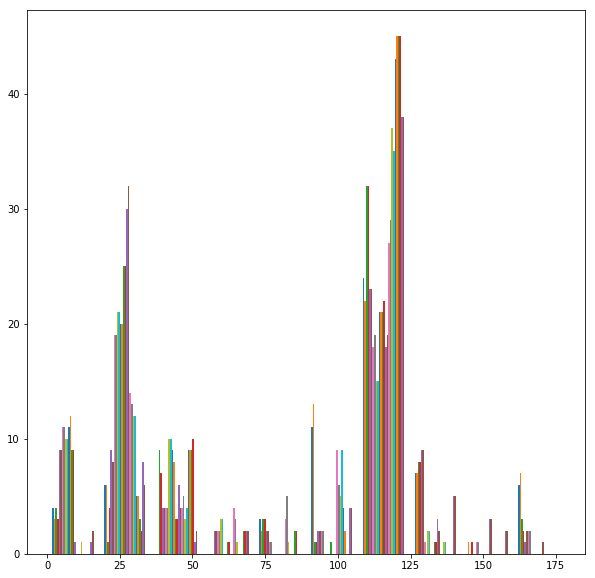

defualt, 1 channel


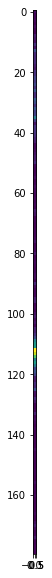

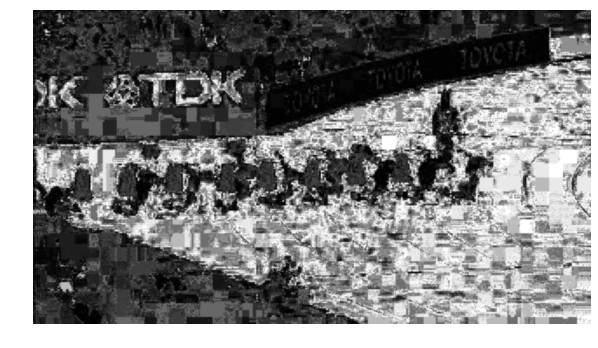

filters


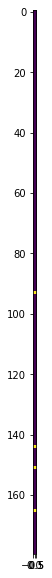

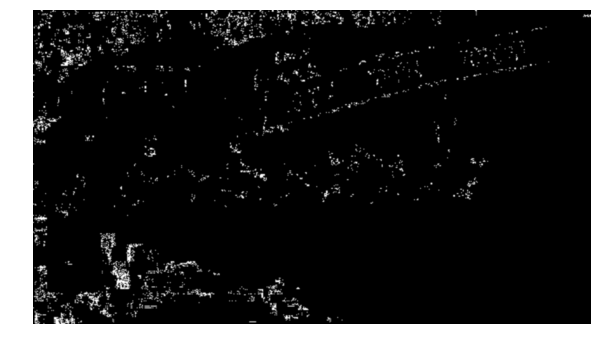

2 channels


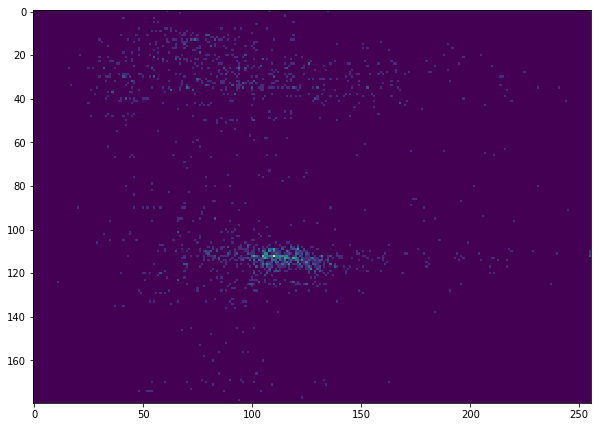

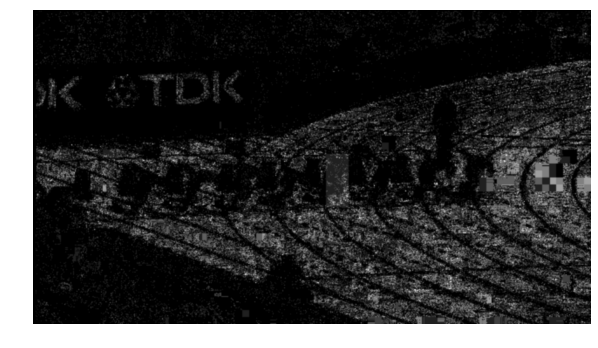

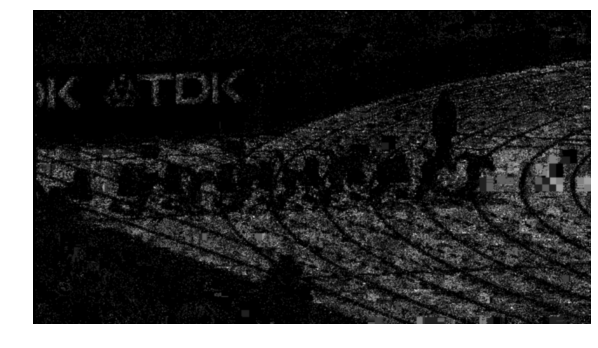

In [10]:
# setup initial location of window
x, y, w, h = track # simply hardcoded the values
track_window = (x, y, w, h)

# set up the ROI for tracking
gray1 = cv.imread(image_list[0])
hsv_original = cv.cvtColor(gray1, cv.COLOR_BGR2HSV)
# draw rectangle
features_img = np.copy(gray1)
cv.rectangle(features_img, (x,y), (x+w, y+h), 255,2)
cv2_imshow(cv.cvtColor(features_img, cv.COLOR_BGR2RGB))

gray2 = cv.imread(image_list[1])
hsv_original2 = cv.cvtColor(gray2, cv.COLOR_BGR2HSV)

roi = gray1[y:y+h, x:x+w]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
cv2_imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
plot_colors_hsv(hsv_roi)


# 1 channel
print('defualt, 1 channel')
roi_hist = cv.calcHist([hsv_roi],[0],None,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
mask = cv.calcBackProject([hsv_original], [0], roi_hist, [0, 180], 1)
plt.imshow(roi_hist)
plt.show()
cv2_imshow(mask)


# 1 channel
# filtered background color
print('filters')
mask1 = cv.inRange(hsv_roi, np.array(filter_mask_from), np.array(filter_mask_to))
# mask2 = cv.inRange(hsv_roi, np.array((120., 0.,0.)), np.array((180.,255.,255.)))
# filter_background_mask = cv.bitwise_or(mask1, mask2)

roi_hist = cv.calcHist([hsv_roi],[0],mask1,[bins],[filter_mask_from[0],filter_mask_to[0]])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
mask = cv.calcBackProject([hsv_original], [0], roi_hist, [filter_mask_from[0],filter_mask_to[0]], 1)
plt.imshow(roi_hist)
plt.show()
cv2_imshow(mask)


# 2 channels
print('2 channels')
roi_hist = cv.calcHist([hsv_roi], [0, 2], None, [180, 256], [0, 180, 0, 256])
plt.imshow(roi_hist)
plt.show()

mask1 = cv.calcBackProject([hsv_original], [0, 2], roi_hist, [0, 180, 0, 256], 1)
cv2_imshow(mask1)
mask2 = cv.calcBackProject([hsv_original2], [0, 2], roi_hist, [0, 180, 0, 256], 1)
cv2_imshow(mask2)

DONE


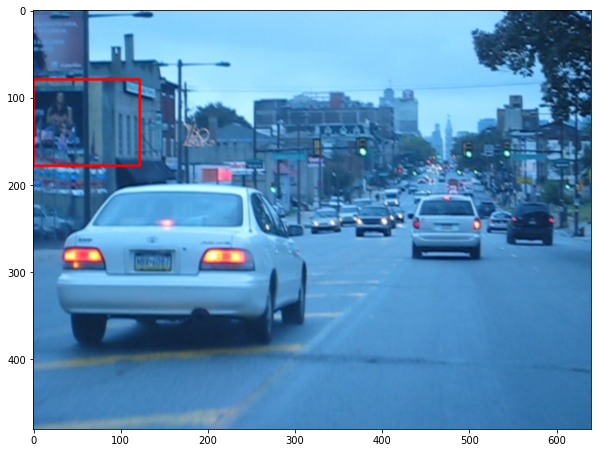

In [14]:
for config in configs[0:1]:
    # load configs
    track = config['track']
    dataset_name = config['dataset_name']
    image_src = config['image_src']
    bins = config['bins']
    filter_mask_from = config['filter_mask_from']
    filter_mask_to = config['filter_mask_to']

    # load images
    image_list = []  
    for file in sorted(glob.glob(image_src)):
        image_list.append(file)


    x, y, w, h = track # simply hardcoded the values
    track_window = (x, y, w, h)
    gray1 = cv.imread(image_list[0])

    roi = gray1[y:y+h, x:x+w]
    hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
    mask1 = cv.inRange(hsv_roi, np.array(filter_mask_from), np.array(filter_mask_to))
    roi_hist = cv.calcHist([hsv_roi],[0],mask1,[bins],[filter_mask_from[0], filter_mask_to[0]])
    cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

    term_criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

    fig = plt.figure()
    tracking_imgs = []

    for i in range(len(image_list)):  
        gray1 = cv.imread(image_list[i])
        hsv_original = cv.cvtColor(gray1, cv.COLOR_BGR2HSV)
        #dst = cv.calcBackProject([hsv_original],[0],roi_hist,[0,180],1) 
        #dst = cv.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)  
        dst = cv.calcBackProject([hsv_original], [0], roi_hist, [filter_mask_from[0], filter_mask_to[0]], 1)

        # apply meanshift to get the new location
        #ret, track_window = cv.CamShift(dst, track_window, term_criteria)
        ret, track_window = cv.meanShift(dst, track_window, term_criteria)

        # draw rectanle
        x,y,w,h = track_window
        features_img = np.copy(cv.cvtColor(gray1, cv.COLOR_BGR2RGB))
        cv.rectangle(features_img, (x,y), (x+w,y+h), 255,2)

        # save frames to create video
        im = plt.imshow(features_img, animated=True, interpolation = 'bicubic')
        tracking_imgs.append([im])

    print('DONE')

    ani = animation.ArtistAnimation(fig, tracking_imgs, interval=500, blit=True,
                                    repeat_delay=1000)
    HTML(ani.to_html5_video()) 
    
#     Writer = animation.writers['ffmpeg']
#     writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#     ani.save('cumshift_{}.mp4'.format(dataset_name), writer=writer)

In [12]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('cumshift_{}.mp4'.format(dataset_name), writer=writer)